## Travelling Salesman Problem (TSP)

The **Travelling Salesman Problem (TSP)** is a classic combinatorial optimization problem where the goal is to find the shortest possible route that visits each city exactly once and returns to the starting city.

### Definition:
Given:
- A set of \( n \) cities, represented as nodes in a graph \( G = (V, E) \),
- A distance (or weight) \( d_{uv} \) between each pair of cities \( u \) and \( v \),

The objective is to determine the order of visiting the cities such that:
1. Each city is visited exactly once,
2. The total travel distance is minimized,
3. The tour ends at the starting city.


The TSP is **NP-hard**, meaning that solving it exactly for a large number of cities is computationally infeasible. Heuristic and approximation algorithms (e.g., genetic algorithms, simulated annealing, quantum optimization methods) are often used to find near-optimal solutions efficiently.

## References
[1] Solve utility-scale quantum optimization problems:  
[qiskit QAOA](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm)

## Small distance TSP

array([[0, 7, 6, 1],
       [7, 0, 3, 2],
       [6, 3, 0, 8],
       [1, 2, 8, 0]])

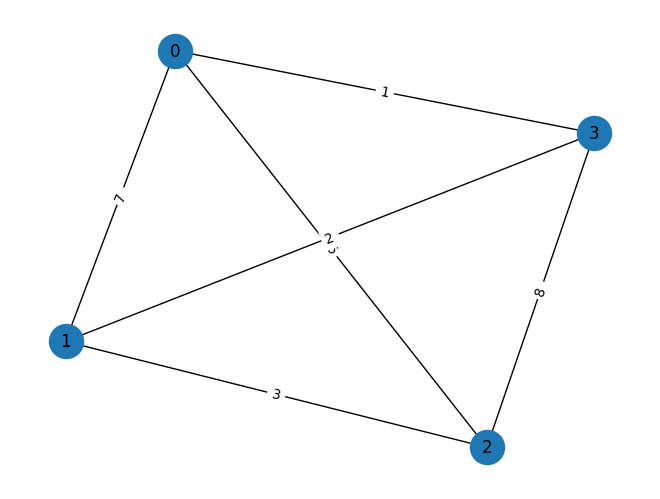

In [22]:
from tsp import TSP

tsp = TSP(4, 123) 
tsp.weight_matrix

## Encode to QUBO

In [23]:
qubo = tsp.qubo("Qiskit", penalty=150)
cost_hamiltonian, offset = qubo['model'], qubo['offset']
print(cost_hamiltonian, f"{offset=}", sep='\n')

SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIIZIIIIZII', 'IIIIIIZIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIIIZIIIIIIIIZII', 'IIZIIIIIIIIIIZII', 'IZIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIZII', 'IIII

## Solve locally

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(β[2]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1]), ParameterVectorElement(γ[2])])


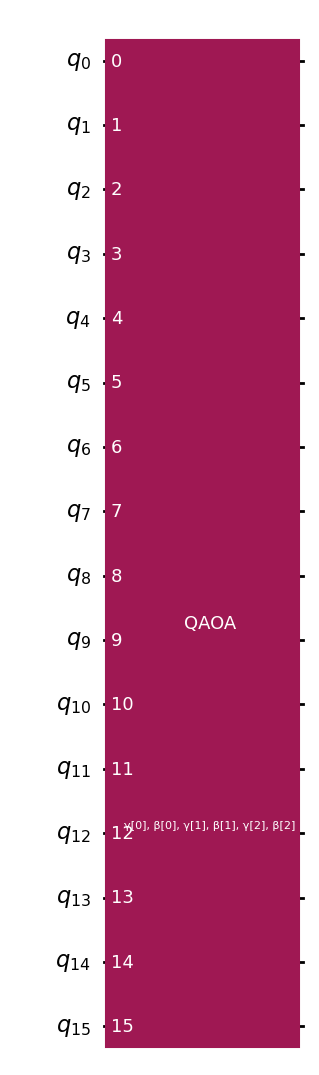

In [24]:
from qiskit.circuit.library import QAOAAnsatz

reps = 3
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=reps)
print(circuit.parameters)
circuit.draw('mpl')

## Optimize Circuit

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.9582215184509131
       x: [ 3.124e+00  1.534e+00  4.186e+00  1.548e+00  3.161e+00
            2.589e+00]
    nfev: 36
   maxcv: 0.0


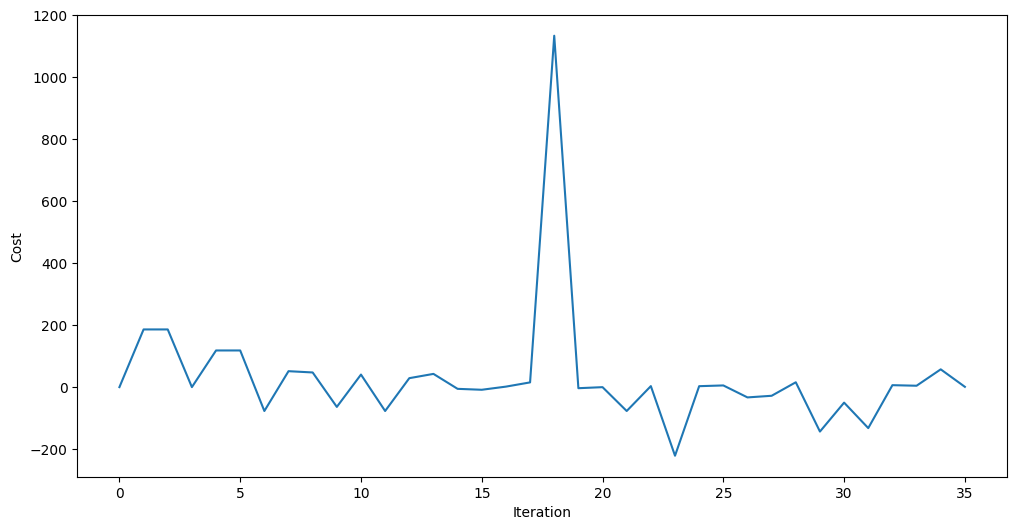

2454.958221518451


In [25]:
from utils import QAOA
from scipy.optimize import minimize
from qiskit.primitives import StatevectorEstimator as Estimator

qaoa = QAOA(circuit, reps=reps)

estimator = Estimator()

result = minimize(
    qaoa.cost_func_estimator,
    qaoa.init_params,
    args=(cost_hamiltonian, estimator),
    method="COBYLA",
    tol=1e-2,
)

print(result)
cost = qaoa.draw_cost_function()
print(cost + offset)

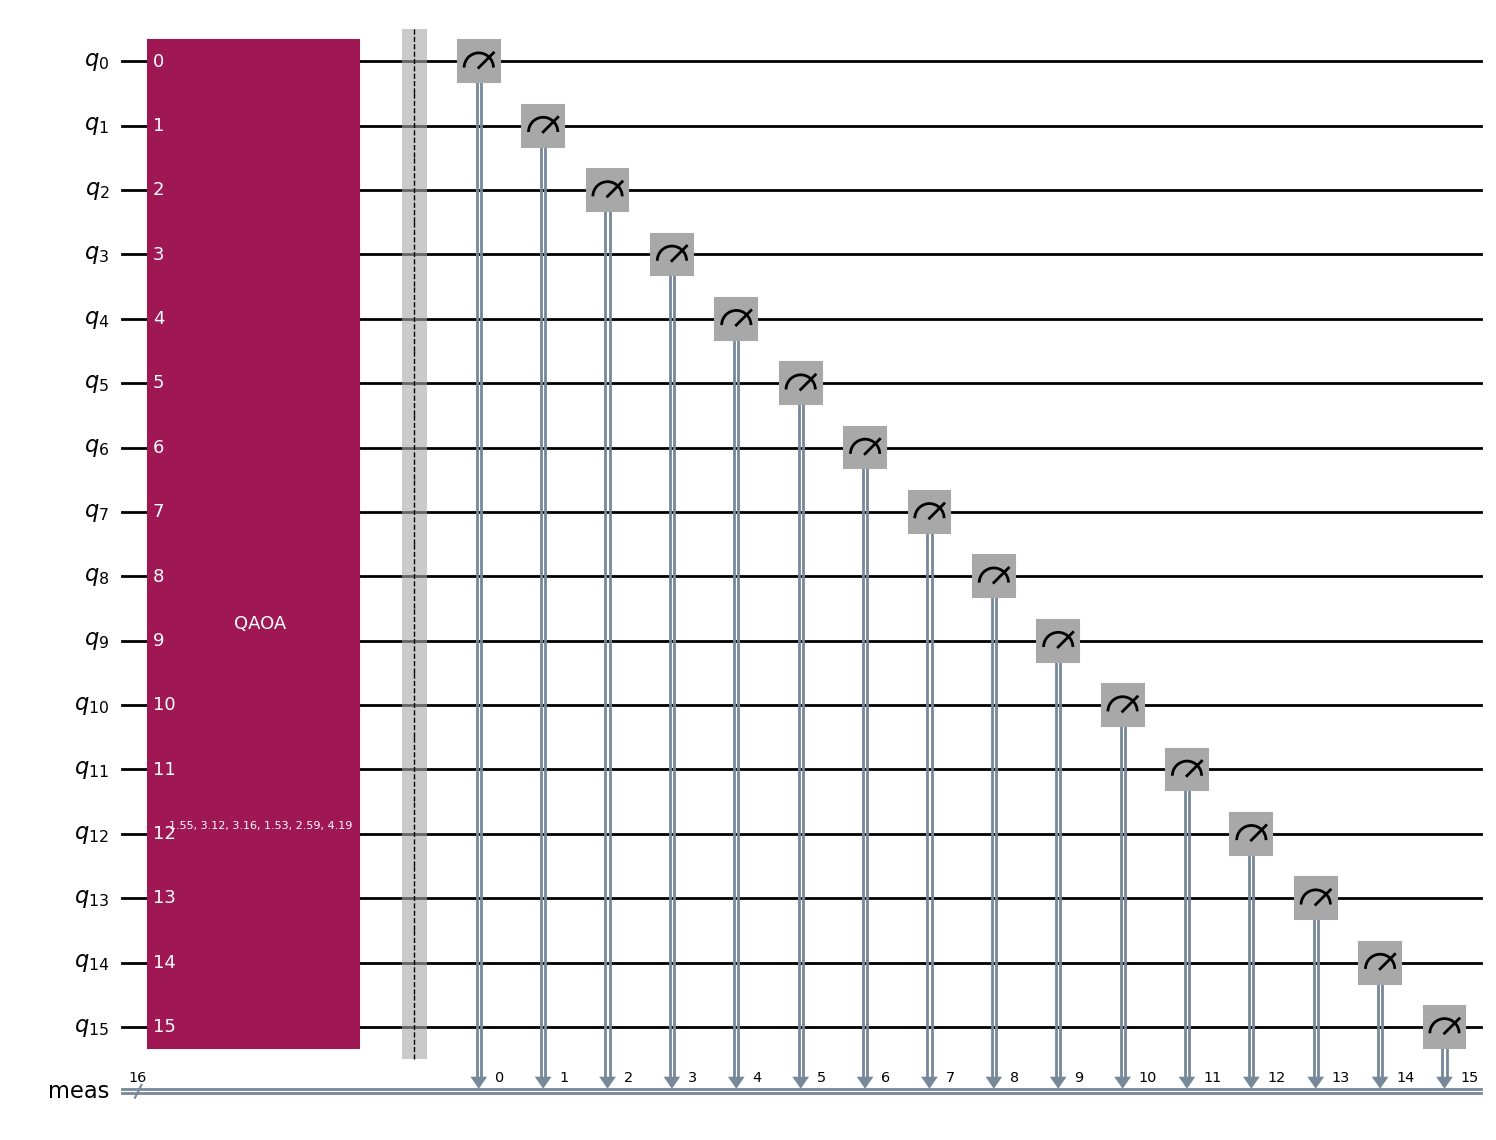

In [26]:
optimized_circuit = circuit.assign_parameters(result.x)
optimized_circuit.measure_all()
optimized_circuit.draw('mpl', fold=False, idle_wires=False)

## Run sampling

In [27]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler(default_shots=10000)

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
result = job.result()

most_likely_bitstring = tsp.interpret(result, "Qiskit", True)
print("Result bitstring:", most_likely_bitstring)

distribution: 
 {61307: 0.0003, 55250: 0.0002, 14523: 0.0002, 18772: 0.0002, 14944: 0.0001, 57934: 0.0001, 52812: 0.0002, 1348: 0.0001, 13057: 0.0001, 34845: 0.0001, 62683: 0.0001, 39129: 0.0001, 62736: 0.0002, 57260: 0.0001, 53663: 0.0001, 32629: 0.0002, 19219: 0.0001, 9865: 0.0001, 32588: 0.0001, 14837: 0.0001, 436: 0.0001, 54603: 0.0002, 37104: 0.0001, 24640: 0.0001, 36435: 0.0001, 1750: 0.0001, 1493: 0.0001, 11573: 0.0002, 57197: 0.0001, 38560: 0.0001, 60234: 0.0001, 39301: 0.0002, 56097: 0.0001, 49571: 0.0001, 52438: 0.0003, 28861: 0.0001, 43778: 0.0001, 13668: 0.0001, 38555: 0.0001, 26162: 0.0002, 1776: 0.0002, 15059: 0.0002, 10511: 0.0001, 21787: 0.0002, 63665: 0.0001, 12702: 0.0001, 50291: 0.0001, 2357: 0.0001, 14706: 0.0001, 38763: 0.0001, 52573: 0.0001, 62506: 0.0001, 41999: 0.0002, 15485: 0.0001, 50329: 0.0001, 45065: 0.0001, 1084: 0.0001, 28109: 0.0001, 31266: 0.0002, 20399: 0.0002, 39599: 0.0001, 6404: 0.0001, 59058: 0.0001, 20291: 0.0001, 60257: 0.0001, 16540: 0.0002, 205

bitstring: [2. 3. 2. 3.], probability: 0.0006
bitstring: [3. 3. 2. 2.], probability: 0.0006
bitstring: [3. 1. 0. 1.], probability: 0.0005
bitstring: [1. 1. 1. 1.], probability: 0.0005
bitstring: [3. 3. 3. 3.], probability: 0.0005
bitstring: [3. 0. 3. 3.], probability: 0.0004
bitstring: [1. 3. 2. 3.], probability: 0.0004
bitstring: [3. 0. 1. 1.], probability: 0.0004
bitstring: [0. 2. 0. 3.], probability: 0.0004
bitstring: [3. 3. 3. 1.], probability: 0.0004
bitstring: [3. 1. 1. 2.], probability: 0.0004
bitstring: [0. 1. 2. 3.], probability: 0.0004
bitstring: [0. 0. 0. 0.], probability: 0.0004
bitstring: [3. 1. 3. 3.], probability: 0.0004
bitstring: [0. 2. 2. 0.], probability: 0.0004
bitstring: [1. 2. 3. 3.], probability: 0.0004
bitstring: [3. 3. 3. 2.], probability: 0.0004
bitstring: [3. 3. 1. 3.], probability: 0.0004
bitstring: [3. 3. 1. 2.], probability: 0.0004
bitstring: [3. 3. 1. 2.], probability: 0.0004


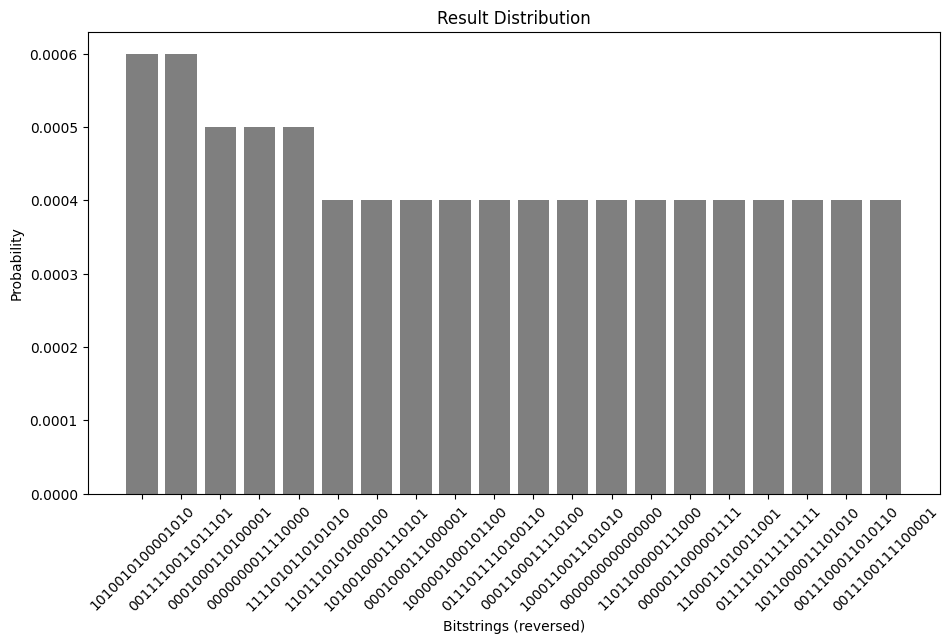

In [28]:
tsp.plot_distribution()